In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                            index_col=0, parse_dates=True).dropna()

In [30]:
data = pd.DataFrame(raw['XAU='])

In [31]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [32]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [34]:
data['position'] = np.sign(data['returns'])

In [35]:
data['strategy'] = data['position'].shift(1) * data['returns']

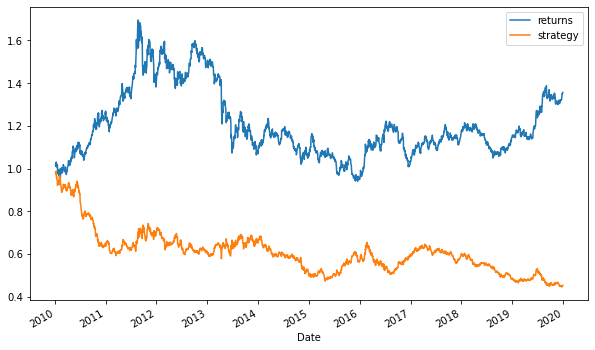

In [36]:
data[['returns', 'strategy']].dropna().cumsum(
                     ).apply(np.exp).plot(figsize=(10, 6));

In [42]:
data['position_3'] = np.sign(data['returns'].rolling(3).mean())

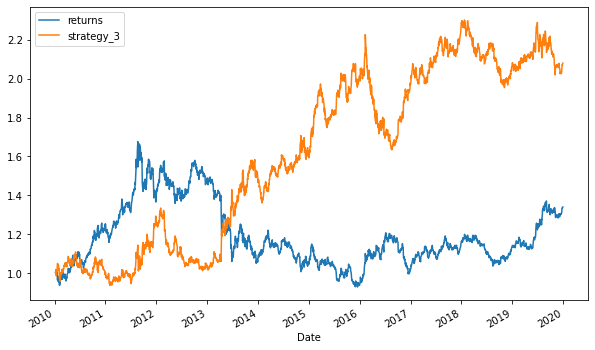

In [43]:
data['strategy_3'] = data['position_3'].shift(1) * data['returns']
data[['returns', 'strategy_3']].dropna().cumsum(
                     ).apply(np.exp).plot(figsize=(10, 6));

#### Intraday data

In [48]:
data = pd.read_csv('data/AAPL_1min_05052020.csv', index_col=0, parse_dates=True)

In [51]:
data['returns'] = np.log(data['CLOSE'] / data['CLOSE'].shift(1))

In [59]:
to_plot = data['returns']

In [60]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns']).rolling(m).mean()
    data['strategy_%d' % m] = data['position_%d' % m].shift(1) * data['returns']
    to_plot = pd.concat([to_plot, data['strategy_%d' % m]], axis=1)

7

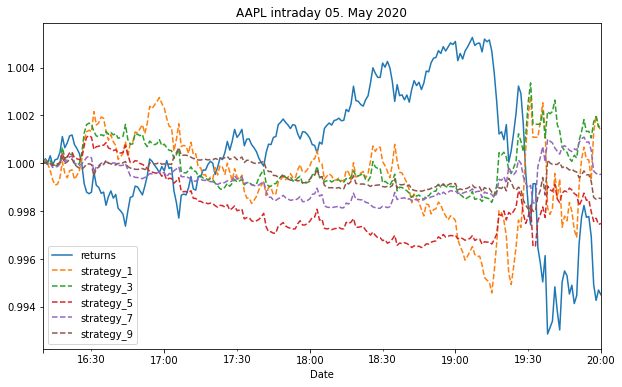

In [62]:
to_plot.dropna().cumsum().apply(np.exp).plot(
             title='AAPL intraday 05. May 2020',
             figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);  7